# Encontro 22: Mundos Pequenos

Importando as bibliotecas:

In [1]:
import sys
sys.path.append('..')

import socnet as sn
import matplotlib.pyplot as plt

%matplotlib inline  

Definindo uma função que gera um grafo aleatório tal que a probabilidade de uma aresta existir é `c` sobre o número de nós:

In [2]:
from random import random


def generate_random_graph(num_nodes, c):
    g = sn.generate_empty_graph(num_nodes)

    nodes = list(g.nodes)

    for i in range(num_nodes):
        n = nodes[i]

        for j in range(i + 1, num_nodes):
            m = nodes[j]

            if random() < c / num_nodes:
                g.add_edge(n, m)

    return g

Gerando um grafo passando parâmetros específicos para a função acima.

In [3]:
N = 100
C = 10

rg = generate_random_graph(N, C)

Verificando se a distribuição dos graus de `pg` segue uma Poisson com média `c`:

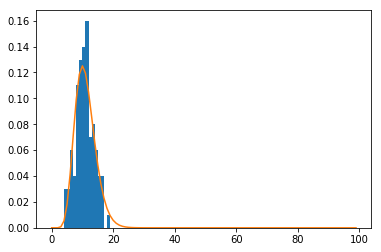

In [4]:
from scipy.stats import poisson


x = range(N)

plt.hist([rg.degree(n) for n in rg.nodes], x, normed=True)

plt.plot(x, poisson.pmf(C, x));

Calculando variação de *clustering coefficient* e *average distance* conforme aumentamos `num_nodes`:

In [5]:
x = []

rcc = []
rad = []

for num_nodes in range(C + 1, N):
    g = generate_random_graph(num_nodes, C)

    x.append(num_nodes)

    rcc.append(sn.clustering_coefficient(g))
    rad.append(sn.average_distance(g))

Plotando variação de *clustering coefficient*:

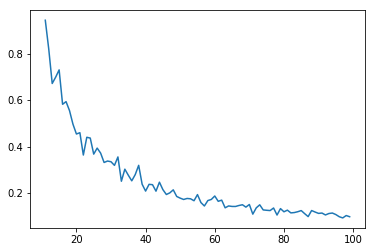

In [6]:
plt.plot(x, rcc);

Plotando variação de *average distance*:

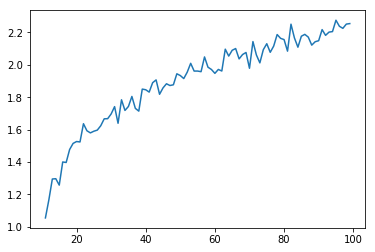

In [7]:
plt.plot(x, rad);

Definindo uma função que gera um grafo circular:

In [8]:
def generate_circular_graph(num_nodes, c):
    g = sn.generate_empty_graph(num_nodes)

    nodes = list(g.nodes)

    for i in range(num_nodes):
        n = nodes[i]

        for delta in range(1, c // 2 + 1):
            j = (i + delta) % num_nodes

            m = nodes[j]

            g.add_edge(n, m)

    return g

Calculando variação de *clustering coefficient* e *average distance* conforme aumentamos `num_nodes`:

In [9]:
ccc = []
cad = []

for num_nodes in x:
    g = generate_circular_graph(num_nodes, C)

    ccc.append(sn.clustering_coefficient(g))
    cad.append(sn.average_distance(g))

Comparando variações de *clustering coefficient*:

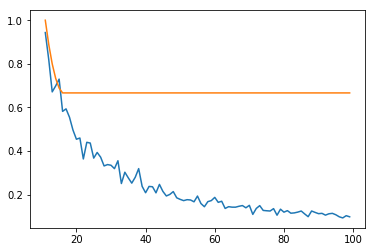

In [10]:
plt.plot(x, rcc)
plt.plot(x, ccc);

Comparando variações de *average distance*:

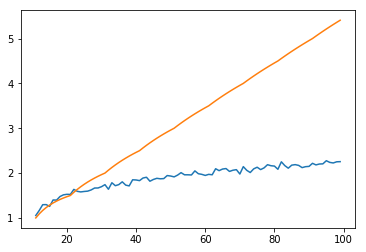

In [11]:
plt.plot(x, rad)
plt.plot(x, cad);

Definindo uma função que gera um grafo híbrido:

In [12]:
from random import choice


def generate_hybrid_graph(num_nodes, c, p):
    g = generate_circular_graph(num_nodes, c)

    for n in g.nodes:
        negatives = set(g.nodes)

        negatives.remove(n)

        for m in g.neighbors(n):
            negatives.remove(m)

        for m in g.neighbors(n):
            if random() < p:
                g.remove_edge(n, m)

                negatives.add(m)

                l = choice(list(negatives))

                negatives.remove(l)

                g.add_edge(n, l)

    return g

Os próximos gráficos serão para `N` e `C` fixos. Por conveniência, vamos repetir a definição.

In [27]:
N = 300
C = 30

Calculando variação de *clustering coefficient* e *average distance* conforme aumentamos `p`:

In [28]:
x = []

hcc = []
had = []

for ip in range(0, 11):
    p = ip / 10

    g = generate_hybrid_graph(N, C, p)

    x.append(p)

    hcc.append(sn.clustering_coefficient(g))
    had.append(sn.average_distance(g))

Comparando variação de *clustering coefficient* com o valor de referência do modelo aleatório.

Em um "pequeno mundo", espera-se um *clustering coefficient* acima desse valor de referência.

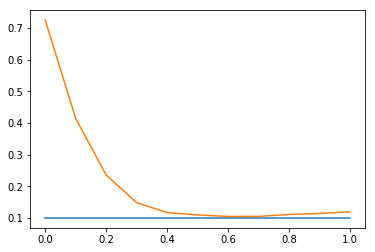

In [29]:
plt.plot(x, 11 * [C / N])
plt.plot(x, hcc);

Comparando variação de *average distance* com o valor de referência do modelo circular.

Em um "pequeno mundo", espera-se um *average distance* abaixo desse valor de referência.

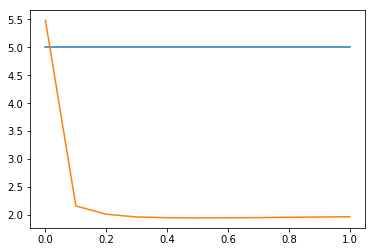

In [30]:
plt.plot(x, 11 * [N / (2 * C)])
plt.plot(x, had);

Para qual valor de `p` temos um "pequeno mundo"?